In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
import warnings
warnings.filterwarnings("ignore")
sns.set(style="whitegrid")

In [54]:
df = pd.read_csv('AIML Dataset.csv')
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [56]:
df["isFraud"].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [57]:
df["isFlaggedFraud"].value_counts()

isFlaggedFraud
0    6362604
1         16
Name: count, dtype: int64

In [58]:
df.isnull().sum().sum()

np.int64(0)

In [59]:
df.shape[0]

6362620

# Percentage of the Frauds to the total data

In [60]:
round(df["isFraud"].value_counts()[1] / df.shape[0] * 100, 2)

np.float64(0.13)

Text(0, 0.5, 'Count')

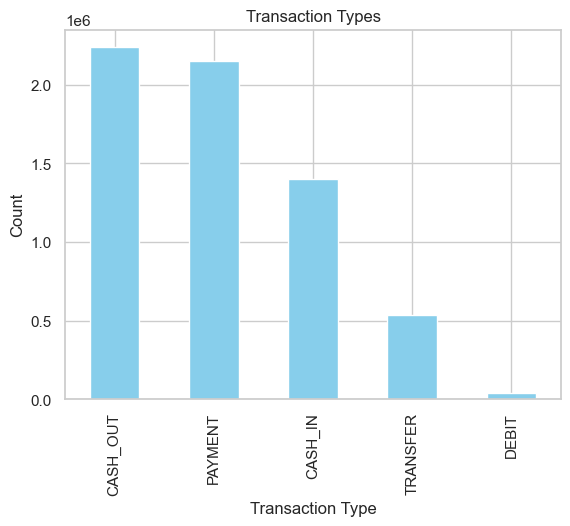

In [61]:
df["type"].value_counts().plot(kind='bar', title='Transaction Types', color='skyblue')
plt.xlabel('Transaction Type')
plt.ylabel('Count')

# Fraut rate by type

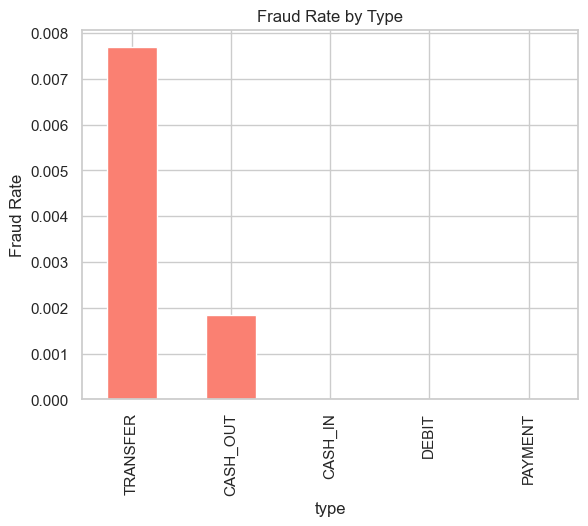

In [62]:
fraud_by_type = df.groupby('type')['isFraud'].mean().sort_values(ascending=False)
fraud_by_type.plot(kind='bar', title='Fraud Rate by Type', color='salmon')
plt.ylabel("Fraud Rate")
plt.show()

In [63]:
df["amount"].describe().astype(int)

count     6362620
mean       179861
std        603858
min             0
25%         13389
50%         74871
75%        208721
max      92445516
Name: amount, dtype: int64

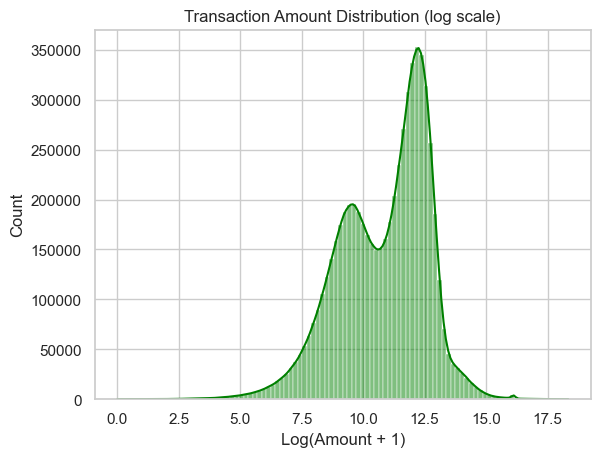

In [64]:
sns.histplot(np.log1p(df["amount"]), bins=100, kde=True, color='green')
plt.title("Transaction Amount Distribution (log scale)")
plt.xlabel("Log(Amount + 1)")
plt.show()

# Relationship of the Fraud and Amount

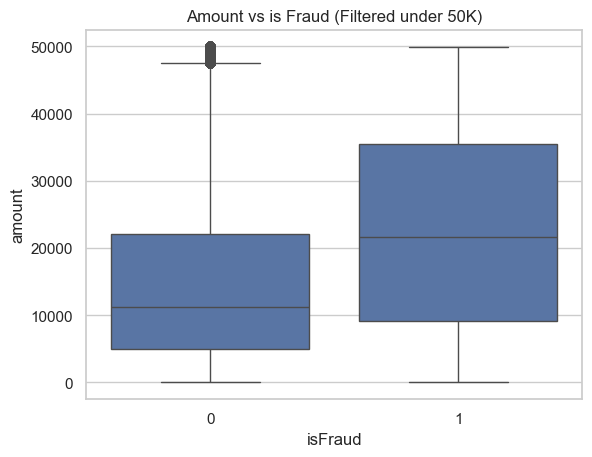

In [65]:
sns.boxplot(data = df[df["amount"] < 50000], x = "isFraud", y = "amount")
plt.title("Amount vs is Fraud (Filtered under 50K)")
plt.show()

In [66]:
df["balanceDiffOrig"] = df["oldbalanceOrg"] - df["newbalanceOrig"]
df["balanceDiffDest"] = df["newbalanceDest"] - df["oldbalanceDest"]

In [67]:
(df["balanceDiffOrig"] < 0).sum(), (df["balanceDiffDest"] < 0).sum()

(np.int64(1399253), np.int64(1238864))

In [68]:
df.head(2)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrig,balanceDiffDest
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,9839.64,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1864.28,0.0


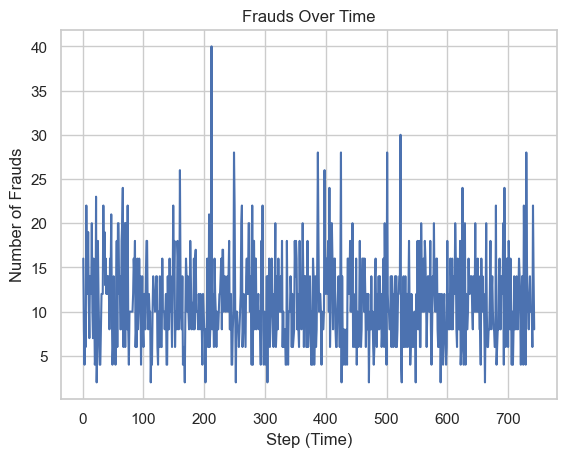

In [69]:
frauds_per_step =  df[df["isFraud"] == 1]["step"].value_counts().sort_index()
plt.plot(frauds_per_step.index, frauds_per_step.values, label = "frauds per Step")
plt.xlabel("Step (Time)")
plt.ylabel("Number of Frauds")
plt.title("Frauds Over Time")
plt.grid(True)
plt.show()

In [70]:
df.drop(columns="step", inplace=True)

In [71]:
df.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrig,balanceDiffDest
0,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,9839.64,0.0
1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1864.28,0.0
2,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,181.00,0.0
3,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,181.00,-21182.0
4,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,11668.14,0.0


In [72]:
top_senders = df["nameOrig"].value_counts().head(10)

In [73]:
top_senders

nameOrig
C1677795071    3
C1999539787    3
C724452879     3
C1976208114    3
C400299098     3
C1784010646    3
C1530544995    3
C1065307291    3
C545315117     3
C1902386530    3
Name: count, dtype: int64

In [74]:
top_receivers = df["nameDest"].value_counts().head(10)

In [75]:
top_receivers

nameDest
C1286084959    113
C985934102     109
C665576141     105
C2083562754    102
C248609774     101
C1590550415    101
C1789550256     99
C451111351      99
C1360767589     98
C1023714065     97
Name: count, dtype: int64

In [76]:
fraud_users = df[df["isFraud"] == 1]["nameOrig"].value_counts().head(10)

In [77]:
fraud_users

nameOrig
C1280323807    1
C1305486145    1
C840083671     1
C1420196421    1
C2101527076    1
C1039979813    1
C2089752665    1
C1614818636    1
C40604503      1
C1970706589    1
Name: count, dtype: int64

In [78]:
fraud_types = df[df["type"].isin(["TRANSFER", 'CASH_OUT'])]

In [79]:
fraud_types["type"].value_counts()

type
CASH_OUT    2237500
TRANSFER     532909
Name: count, dtype: int64

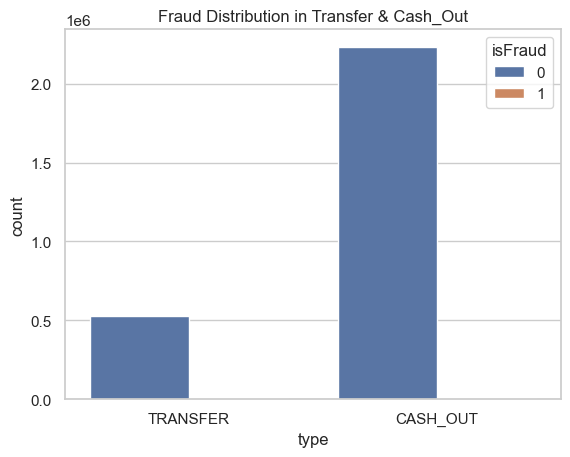

In [80]:
sns.countplot(data=fraud_types, x='type', hue='isFraud')
plt.title("Fraud Distribution in Transfer & Cash_Out")
plt.show()

In [81]:
corr = df[["amount", "oldbalanceOrg", "newbalanceOrig", "oldbalanceDest", "newbalanceDest", "isFraud"]].corr()

In [82]:
corr

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
amount,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688
oldbalanceOrg,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154
newbalanceOrig,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148
oldbalanceDest,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885
newbalanceDest,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535
isFraud,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000


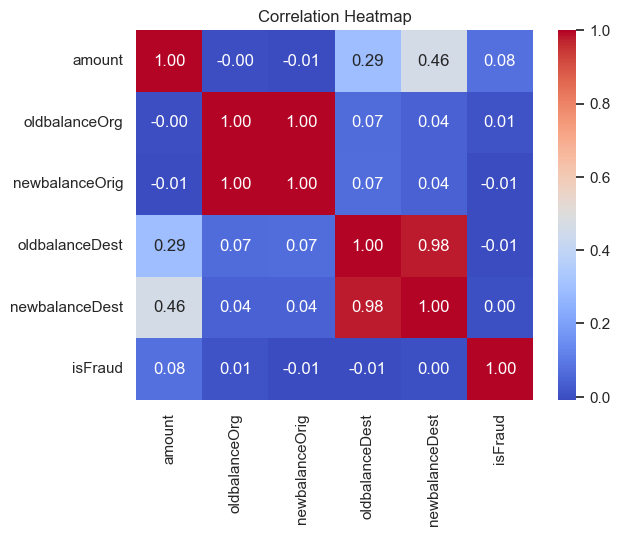

In [83]:
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [84]:
zero_after_transfer = df[
    (df["oldbalanceOrg"] > 0) &
    (df["newbalanceOrig"] == 0) &
    (df["type"].isin(["TRANSFER", "CASH_OUT"]))
]

In [85]:
len(zero_after_transfer)

1188074

In [86]:
zero_after_transfer.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrig,balanceDiffDest
2,TRANSFER,181.00,C1305486145,181.0,0.0,C553264065,0.0,0.00,1,0,181.0,0.00
3,CASH_OUT,181.00,C840083671,181.0,0.0,C38997010,21182.0,0.00,1,0,181.0,-21182.00
15,CASH_OUT,229133.94,C905080434,15325.0,0.0,C476402209,5083.0,51513.44,0,0,15325.0,46430.44
19,TRANSFER,215310.30,C1670993182,705.0,0.0,C1100439041,22425.0,0.00,0,0,705.0,-22425.00
24,TRANSFER,311685.89,C1984094095,10835.0,0.0,C932583850,6267.0,2719172.89,0,0,10835.0,2712905.89


In [87]:
df["isFraud"].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [101]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, average_precision_score, roc_auc_score
import numpy as np
import joblib
from xgboost import XGBClassifier

In [ ]:
df.head()

In [103]:
df_model = df.drop(["nameOrig", "nameDest", "isFlaggedFraud"], axis=1)

In [ ]:
df_model.head()

In [105]:
categorical = ["type"]
numeric = ["amount", "oldbalanceOrg", "newbalanceOrig", "oldbalanceDest", "newbalanceDest"]

In [106]:
y = df_model["isFraud"]
X = df_model.drop("isFraud", axis=1)

In [107]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, stratify=y, random_state=42
)

In [108]:
preprocessing = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(with_mean=False), numeric),  # with_mean=False cho sparse-safe
        ("cat", OneHotEncoder(drop="first", handle_unknown="ignore"), categorical),
    ],
    remainder="drop"
)

In [109]:
X_train_prep = preprocessing.fit_transform(X_train)
X_test_prep  = preprocessing.transform(X_test)

In [110]:
neg, pos = np.bincount(y_train)
scale_pos_weight = neg / max(pos, 1)

In [111]:
xgb = XGBClassifier(
    n_estimators=1000,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_lambda=1.0,
    objective="binary:logistic",
    eval_metric="aucpr",
    tree_method="hist",          # nhanh
    random_state=42,
    scale_pos_weight=scale_pos_weight
)

In [113]:
xgb.fit(
    X_train_prep, y_train,
    eval_set=[(X_test_prep, y_test)],
    verbose=False
)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='aucpr', feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=1000,
              n_jobs=None, num_parallel_tree=None, ...)

In [116]:
y_score = xgb.predict_proba(X_test_prep)[:, 1]

# PR-AUC, ROC-AUC để tham khảo
print(f"PR-AUC:  {average_precision_score(y_test, y_score):.6f}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_score):.6f}")


prec, rec, thr = precision_recall_curve(y_test, y_score)
# thr dài kém 1 phần tử so với prec/rec
f1 = 2 * (prec[:-1] * rec[:-1]) / (prec[:-1] + rec[:-1] + 1e-12)
best_idx = np.nanargmax(f1)
best_th = thr[best_idx]

print(f"Best threshold by F1: {best_th:.6f}")
y_pred = (y_score >= best_th).astype(int)

print(classification_report(y_test, y_pred, digits=6))
print(confusion_matrix(y_test, y_pred))

PR-AUC:  0.938107
ROC-AUC: 0.999151
ROC-AUC: 0.999151
Best threshold by F1: 0.995431
Best threshold by F1: 0.995431
              precision    recall  f1-score   support

           0   0.999745  0.999909  0.999827   1906322
           1   0.919107  0.802354  0.856771      2464

    accuracy                       0.999654   1908786
   macro avg   0.959426  0.901131  0.928299   1908786
weighted avg   0.999640  0.999654  0.999642   1908786

[[1906148     174]
 [    487    1977]]
              precision    recall  f1-score   support

           0   0.999745  0.999909  0.999827   1906322
           1   0.919107  0.802354  0.856771      2464

    accuracy                       0.999654   1908786
   macro avg   0.959426  0.901131  0.928299   1908786
weighted avg   0.999640  0.999654  0.999642   1908786

[[1906148     174]
 [    487    1977]]


In [ ]:
joblib.dump({"pipeline": pipeline, "threshold": float(best_th)}, "fraud_xgb.pkl")

['fraud_detection_model.pkl']